# **Absenteeism in Toms River High School East**
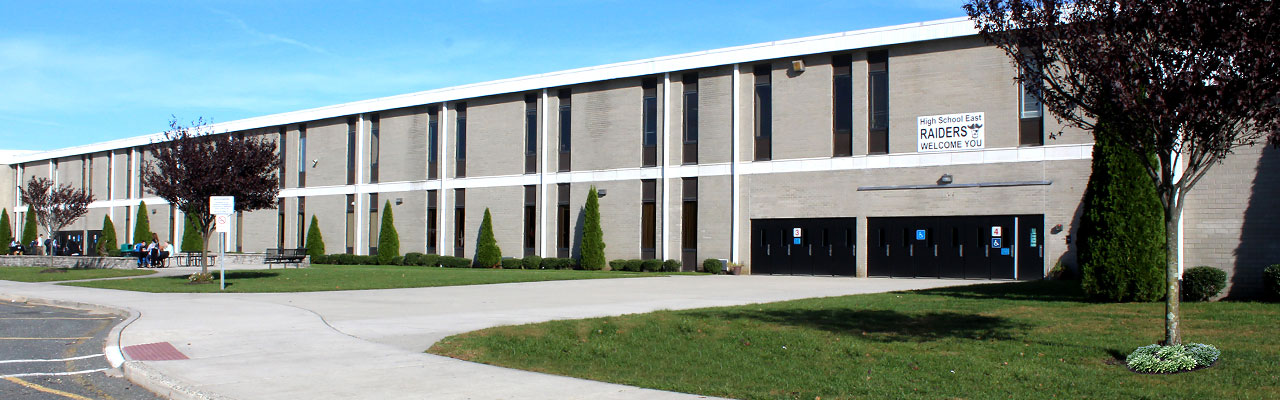

***

## Introduction
Toms River High School East (TRSHE), a comprehensive four-year high school located in New Jersey, is affected by large absent rates. In fact, the chronic absenteeism rates in TRSHE has been above the NJ state average rates from grades 9th to 12th. This kernel's objective is to better understand the underlying patterns of TRSHE absenteeism, how certain factors contribute to these patterns, and the type of methods that are best for prediction.

T-Test to check for significance.

Outline:
1. [Data Overview](#section-one)

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

student_data = pd.read_csv('../input/High School East Student Data - Sheet1 (1).csv')
student_data = student_data.drop(17, axis=0).reset_index() # contains 'TRANSFER', will revisit


<a id="section-one"></a>
# 1. Data Overview

The data was collected through the help of Mrs. Anders and Dr. Kretz, both faculty of TRSHE. Certain variables were chosen because chronic absenteeism is susceptible to variables like **Limited English Proficiency, 504/IDEA Disability, Race/Ethnicity**, and likewise. A comprehensive and large dataset of students in the United States conducted by the National Center for Education Statistics exists, but many important variables were surpressed for public-use. Accessing that data is a **rigorous** and **security-tight** process involving various academic officers that no regular person could pass. So that wasn't happening. So I resorted to my school data.

Thus, the data collected for this project was **manually** recorded. 
***

**A6-A12**: represents absences from 6th grade to 12th grade

**T6-T12**: represents tardies from 6th grade to 12th grade

**IEP/Specialized**: represents whether a student is in special education

In [33]:
student_data.head()

,index,Student,English Langauge Learner,Has a Disability?,Student on Free or Reduced Lunch,Race/Ethnic,A6,A7,A8,A9,...,A12,T6,T7,T8,T9,T10,T11,T12,Gender,IEP/Specialized
0,0,CA,Yes/No?,No,No,Asian,1,0,0,0,...,0,9,4,5,1,2,2,1,M,No
1,1,CI,No,No,NaN,White,5,9,5,6,...,3,2,2,3,4,2,4,1,F,No
2,2,CIS,NaN,No,NaN,White/Hispanic,0,0,0,0,...,2,0,0,0,0,0,5,2,F,No
3,3,DIP,NaN,No,NaN,White,2,7,8,7,...,13,1,0,3,6,7,9,3,F,No
4,4,EA,NaN,No,NaN,White,7,10,7,4,...,1,1,0,0,0,5,0,0,F,No


In [34]:
print(student_data.iloc[0].values[6:13]) # absence columns
print(student_data.iloc[0].values[14:20]) #tardy columns

['1' '0' '0' '0' '1' 2 0]
['4' '5' '1' 2 2 1]


For some reason, some of the variables in the **A6** to **A12** and **T6** to **T12** columns are represented as strings instead of integers. So I made some adjustments and converted the necessary values to int values. 

In [35]:

#convert absenses and tardies to integers for all students
for i in range(6,13):
    absences_column = "A%d" % i
    tardies_column = "T%d" % i
    
    student_data[absences_column] = student_data[absences_column].apply(int)
    student_data[tardies_column] = student_data[tardies_column].apply(int)
    
print(student_data.iloc[0].values[6:13]) # absence columns of first student
print(student_data.iloc[0].values[14:20]) #tardy columns
    

[1 0 0 0 1 2 0]
[4 5 1 2 2 1]


# 2. Evaluating Data

Plotting to see if there are any glaryingly obvious patterns or relationships between variables.

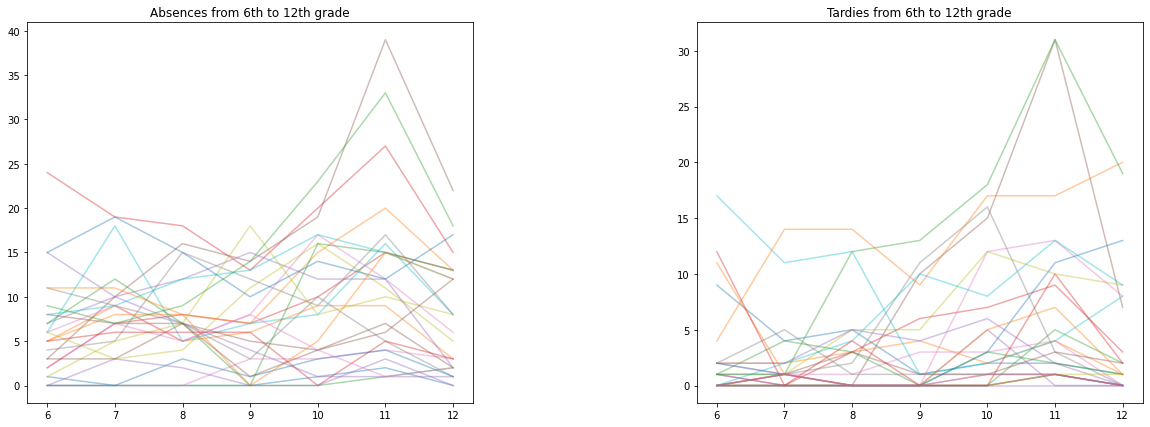

In [36]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
#plt.figure(figsize=(2,10))

# 6:13 represents the absent columns
# 13:20 represents the tardy columns
x_values = range(6,13)
for i in range(len(student_data)):
    absences_y = student_data.iloc[i].values[6:13]
    tardies_y = student_data.iloc[i].values[13:20]

    ax1.plot(x_values, np.array(absences_y), alpha=0.4)    
    ax2.plot(x_values, np.array(tardies_y), alpha=0.4)

ax1.set_title("Absences from 6th to 12th grade")
ax2.set_title("Tardies from 6th to 12th grade")

plt.subplots_adjust(wspace=0.5)

As expected, there isn't a one-fit-all absent and tardy pattern across all the grade levels. But there seems to be similarity in the peaks, so it would be useful to see the correlation between .